In [230]:
%reload_ext autoreload
%autoreload 2
%pwd

'/home/dana/development/intradays/Intraday/notebooks'

In [231]:
import sys
sys.path.append('..')
from src.BotTrader import BotTrader
from src.NethFish import NethFish

In [232]:
# IMPORT local.seetings.json to Jupyter Notebook, so all secrets would be available

import os
import json

# Define the path to your local.settings.json file
settings_path = '/home/dana/development/intradays/local.settings.json'

try:
    with open(settings_path, 'r') as file:
        settings = json.load(file)

    # Extract the environment variables from the JSON structure
    # local.settings.json typically stores them under a "Values" key
    env_variables = settings.get('Values', {})  # Adjust key if necessary

    # Set the environment variables in the current Jupyter session
    for key, value in env_variables.items():
        os.environ[key] = str(value)

except Exception as e:
    print(f"Error loading environment variables: {e}")


In [233]:
import csv
import json

# Execute the cURL command and capture the output
import subprocess
import time
import urllib.parse
from abc import ABC, abstractmethod
from datetime import date, datetime, timedelta, timezone
from pathlib import Path
from typing import List, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from powerbot_client import (
    ApiClient,
    Configuration,
    ContractApi,
    MarketApi,
    OrderEntry,
    OrderModify,
    OrdersApi,
    SignalEntry,
    SignalsApi,
    SignalTimeSlice,
    TradesApi,
)
from pytz import FixedOffset  # For creating a fixed offset timezone
from sklearn.linear_model import LinearRegression

# Get trades for NL Fish

In [234]:
delivery_from = "2024-12-03T00:00:00Z"
delivery_to = "2024-12-31T09:00:00Z"

In [258]:
config = {
    "URL": os.environ['POWERBOT_HOST_URL_NORDPOOL'] ,
    "API_KEY_FROM": os.environ['POWERBOT_API_NL_FISH'] ,
    "API_KEY_TO": os.environ['POWERBOT_API_NL_FISH'] ,
    "DELIVERY_AREA": os.environ['NL_NORDPOOL_DELIVERY_AREA'] ,
    "DELIVERY_START_FROM": "2025-01-09T00:00:00Z",
    "DELIVERY_START_TO": "2025-01-16T14:00:00Z",
    "PORTFOLIO_ID_FROM": "P_NL5",
    "PORTFOLIO_ID_TO": "P_NL6",
    "settings": {"mode": "fast"}
}
nlfisk = NethFish(config)
nlfisk.get_trades()

In [259]:
nlfisk.get_weighted_average_prices()
nlfisk.get_weighted_average_minutes_to_delivery_start()

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,weighted_mean_price,diff_hour,weighted_minutes_to_delivery_start
0,X586141480,ACTI,nordpool,10YNL----------L,2025-01-08 14:48:56.701000+00:00,2025-01-08 14:48:56.543000+00:00,NX_498337,PH-20250109-05,2025-01-09 03:00:00+00:00,2025-01-09 04:00:00+00:00,...,True,None,P_NL5,None,Opportunity SELL --SELL--Hour:3--Ref:94.64--Op...,None,False,62.510,12.184294,12.658396
1,X586399200,ACTI,nordpool,10YNL----------L,2025-01-08 21:34:49.642000+00:00,2025-01-08 21:34:49.579000+00:00,NX_498428,PH-20250109-16,2025-01-09 14:00:00+00:00,2025-01-09 15:00:00+00:00,...,True,None,P_NL5,None,Opportunity SELL --SELL--Hour:16--Ref:133.42--...,None,False,117.250,16.419561,13.729730
2,X586578347,ACTI,nordpool,10YNL----------L,2025-01-09 03:09:24.612000+00:00,2025-01-09 03:09:24.542000+00:00,NX_498456,PH-20250109-20,2025-01-09 18:00:00+00:00,2025-01-09 19:00:00+00:00,...,True,None,P_NL5,None,Regular BUY --BUY--Hour:18--Ref:101.66--Opp:11...,None,False,100.570,14.843183,13.343455
3,X587058554,ACTI,nordpool,10YNL----------L,2025-01-09 13:00:03.682000+00:00,2025-01-09 13:00:03.526000+00:00,NX_498489,PH-20250109-24,2025-01-09 22:00:00+00:00,2025-01-09 23:00:00+00:00,...,True,None,P_NL5,None,Opportunity SELL --SELL--Hour:0--Ref:90.01--Op...,None,False,76.350,8.999021,16.832844
4,X587197127,ACTI,nordpool,10YNL----------L,2025-01-09 16:14:37.219000+00:00,2025-01-09 16:14:37.168000+00:00,NX_498570,PH-20250110-11,2025-01-10 09:00:00+00:00,2025-01-10 10:00:00+00:00,...,True,None,P_NL5,None,Regular BUY --BUY--Hour:11--Ref:111.21--Opp:12...,None,False,106.550,16.756342,16.756342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,X591569755,ACTI,nordpool,10YNL----------L,2025-01-14 20:53:02.168000+00:00,2025-01-14 20:53:02.098000+00:00,NX_499560,PH-20250115-19,2025-01-15 17:00:00+00:00,2025-01-15 18:00:00+00:00,...,None,True,None,P_NL5,None,Opportunity BUY --BUY--Hour:19--Ref:278.6--Opp...,False,311.560,20.116084,19.338532
164,X591578352,ACTI,nordpool,10YNL----------L,2025-01-14 21:17:11.991000+00:00,2025-01-14 21:17:11.938000+00:00,NX_499482,PH-20250115-09,2025-01-15 07:00:00+00:00,2025-01-15 08:00:00+00:00,...,None,True,None,P_NL5,None,Opportunity BUY --BUY--Hour:9--Ref:270.64--Opp...,False,302.940,9.713351,12.499829
165,X591589916,ACTI,nordpool,10YNL----------L,2025-01-14 21:30:11.424000+00:00,2025-01-14 21:30:04.524000+00:00,NX_499552,PH-20250115-18,2025-01-15 16:00:00+00:00,2025-01-15 17:00:00+00:00,...,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:18--Ref:385.53--Opp:...,False,369.505,18.498743,16.082527
166,X592164997,ACTI,nordpool,10YNL----------L,2025-01-15 13:12:36.521000+00:00,2025-01-15 13:12:36.455000+00:00,NX_499611,PH-20250116-01,2025-01-15 23:00:00+00:00,2025-01-16 00:00:00+00:00,...,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:1--Ref:138.67--Opp:1...,False,143.210,9.789874,9.384310


In [260]:
data_vis = nlfisk.get_profit_loss()
# data_vis.to_csv('../outputs/trial_data.csv', index=False)

In [261]:
data_vis['contract_id'].unique()

array(['NX_498337', 'NX_498428', 'NX_498456', 'NX_498489', 'NX_498570',
       'NX_498612', 'NX_498630', 'NX_498604', 'NX_498676', 'NX_498669',
       'NX_498653', 'NX_498578', 'NX_498596', 'NX_498586', 'NX_498623',
       'NX_498660', 'NX_498725', 'NX_498825', 'NX_498733', 'NX_498832',
       'NX_498839', 'NX_498847', 'NX_498929', 'NX_498975', 'NX_498922',
       'NX_498967', 'NX_499163', 'NX_499138', 'NX_499090', 'NX_499154',
       'NX_499146', 'NX_499083', 'NX_499109', 'NX_499100', 'NX_499119',
       'NX_499177', 'NX_499170', 'NX_499240', 'NX_499321', 'NX_499289',
       'NX_499338', 'NX_499393', 'NX_499408', 'NX_499313', 'NX_499297',
       'NX_499305', 'NX_499345', 'NX_499329', 'NX_499375', 'NX_499415',
       'NX_499353', 'NX_499368', 'NX_499386', 'NX_499424', 'NX_499445',
       'NX_499467', 'NX_499459', 'NX_499568', 'NX_499431', 'NX_499552',
       'NX_499452', 'NX_499482', 'NX_499497', 'NX_499504', 'NX_499512',
       'NX_499519', 'NX_499526', 'NX_499536', 'NX_499543', 'NX_4

In [262]:
data_vis.columns

Index(['trade_id', 'state', 'exchange', 'delivery_area', 'api_timestamp',
       'exec_time', 'contract_id', 'contract_name', 'delivery_start',
       'delivery_end', 'price', 'quantity', 'buy', 'sell', 'buy_portfolio_id',
       'sell_portfolio_id', 'buy_txt', 'sell_txt', 'self_trade',
       'weighted_mean_price', 'diff_hour',
       'weighted_minutes_to_delivery_start', 'quantity_bought', 'price_bought',
       'quantity_sold', 'price_sold', 'profit', 'pnl', 'winning',
       'weighted_minutes_to_delivery_start_opener',
       'weighted_minutes_to_delivery_start_closer'],
      dtype='object')

In [263]:
data_vis['hours_of_contract'] = data_vis['delivery_start'].dt.hour
data_vis['hours_of_execution'] = data_vis['exec_time'].dt.hour

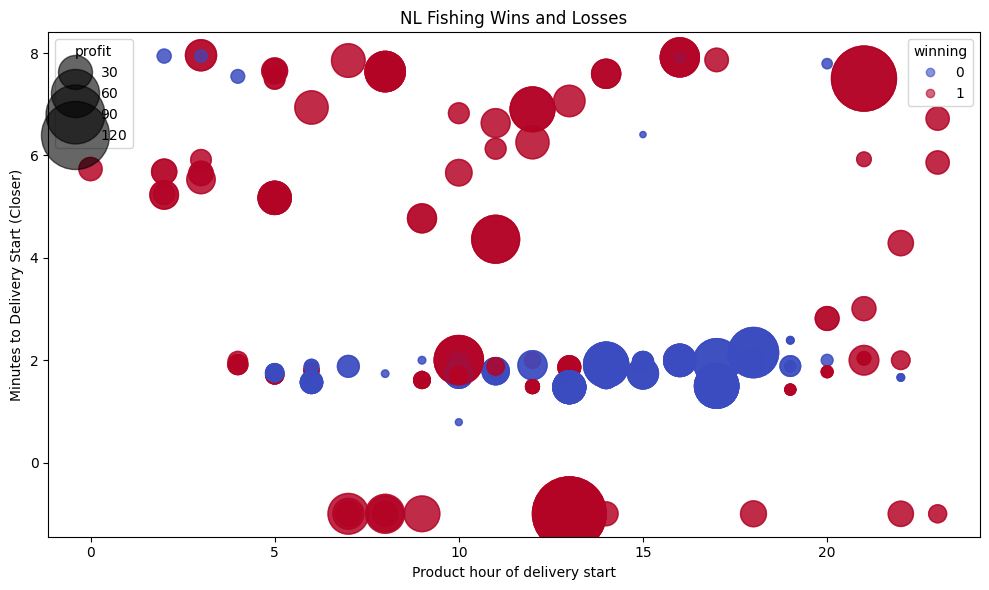

In [264]:
fig, ax = nlfisk.scatter_plot_for_hours(data_vis,
                             x_variable='hours_of_contract',
                             y_variable='weighted_minutes_to_delivery_start_closer',
                             boolean_variable='winning',
                             size_variable='profit',
                             title='NL Fishing Wins and Losses',
                             x_label_str='Product hour of delivery start',
                             y_label_str='Minutes to Delivery Start (Closer)',)
plt.show()
fig.savefig('../outputs/01_hours_to_delivery.jpeg', dpi=300)

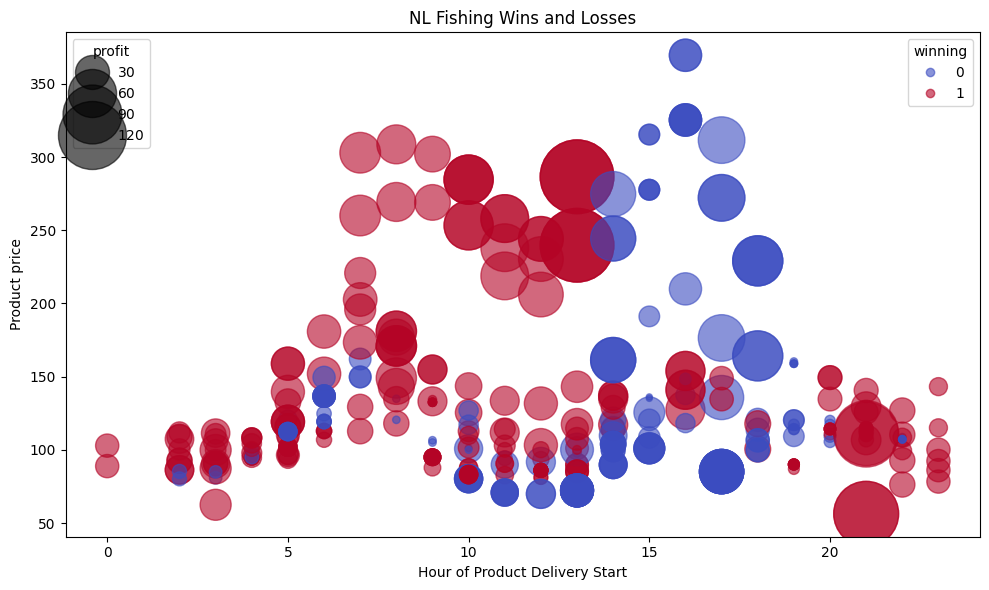

In [265]:
fig, ax = nlfisk.scatter_plot_for_hours(data_vis,
                             x_variable='hours_of_contract',
                             y_variable='weighted_mean_price',
                             boolean_variable='winning',
                             size_variable='profit',
                             title='NL Fishing Wins and Losses',
                             x_label_str='Hour of Product Delivery Start',
                             y_label_str='Product price',)
plt.show()
fig.savefig('../outputs/02_hours_to_price.jpeg', dpi=300)

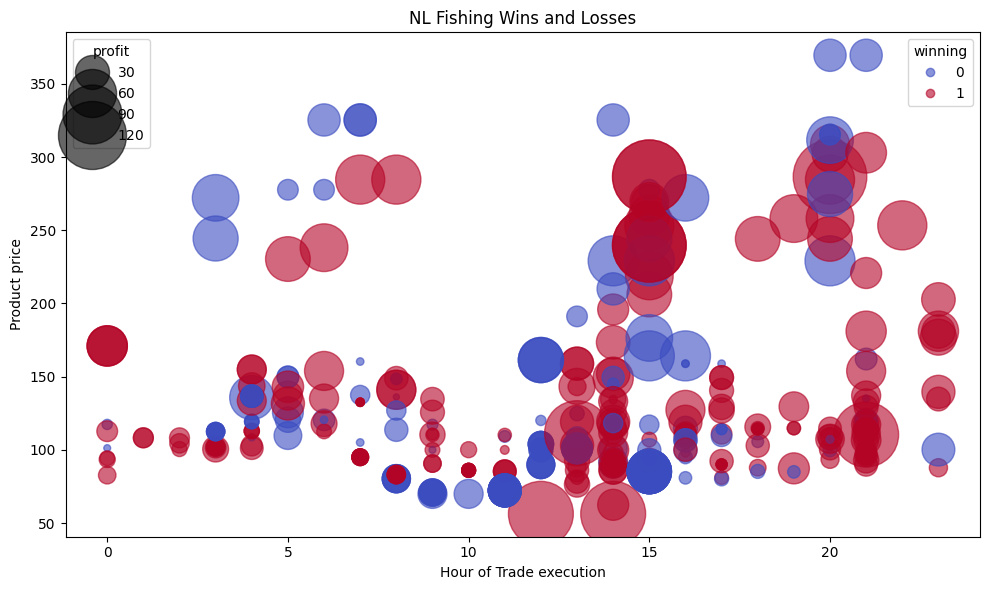

In [266]:
fig, ax = nlfisk.scatter_plot_for_hours(data_vis,
                             x_variable='hours_of_execution',
                             y_variable='weighted_mean_price',
                             boolean_variable='winning',
                             size_variable='profit',
                             title='NL Fishing Wins and Losses',
                             x_label_str='Hour of Trade execution',
                             y_label_str='Product price',)
plt.show()
fig.savefig('../outputs/05_exec_hours_to_price.jpeg', dpi=300)

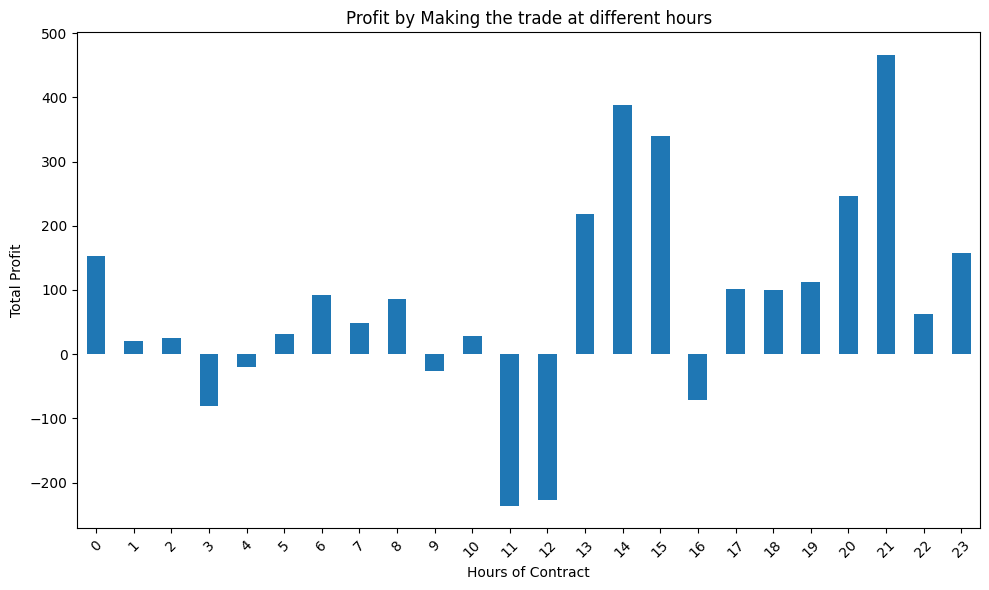

In [267]:
plot = data_vis.groupby('hours_of_execution').profit.sum().plot(kind='bar')

# Adjust the figure size if needed
plt.gcf().set_size_inches(10, 6)  # Makes the figure larger

# Add labels and title if desired
plt.xlabel('Hours of Contract')
plt.ylabel('Total Profit')
plt.title('Profit by Making the trade at different hours')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Save the figure
plt.savefig('../outputs/06_exec_hours_to_profit.jpeg',
            dpi=300,
            bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [268]:
unique_10_15 = data_vis.loc[(data_vis['hours_of_contract']>=10) & (data_vis['hours_of_contract'] <= 15),:]['exec_time'].unique()
data_vis.loc[~data_vis['exec_time'].isin(unique_10_15),:].profit.sum()

np.float64(1109.9040000000005)

In [269]:
unique_10_15 = data_vis.loc[(data_vis['hours_of_contract']>=10) & (data_vis['hours_of_contract'] <= 15),:]['exec_time'].unique()
data_vis.loc[data_vis['exec_time'].isin(unique_10_15),:].profit.sum()

np.float64(906.718000000001)

In [270]:
unique_10_15 = data_vis.loc[(data_vis['weighted_mean_price']>=90),:]['exec_time'].unique()
data_vis.loc[data_vis['exec_time'].isin(unique_10_15),:].profit.sum()

np.float64(2455.9190000000012)

In [271]:
unique_10_15 = data_vis.loc[(data_vis['weighted_mean_price']<90),:]['exec_time'].unique()
data_vis.loc[data_vis['exec_time'].isin(unique_10_15),:].profit.sum()

np.float64(-439.8139999999996)

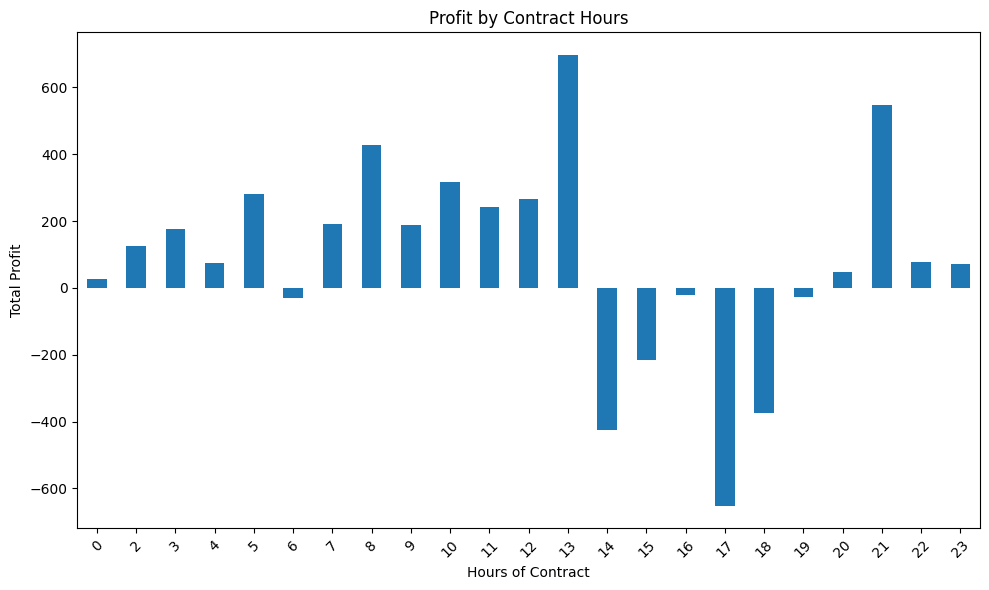

In [272]:
plot = data_vis.groupby('hours_of_contract').profit.sum().plot(kind='bar')

# Adjust the figure size if needed
plt.gcf().set_size_inches(10, 6)  # Makes the figure larger

# Add labels and title if desired
plt.xlabel('Hours of Contract')
plt.ylabel('Total Profit')
plt.title('Profit by Contract Hours')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Save the figure
plt.savefig('../outputs/03_hours_to_profit.jpeg',
            dpi=300,
            bbox_inches='tight')

# Show the plot (optional)
plt.show()


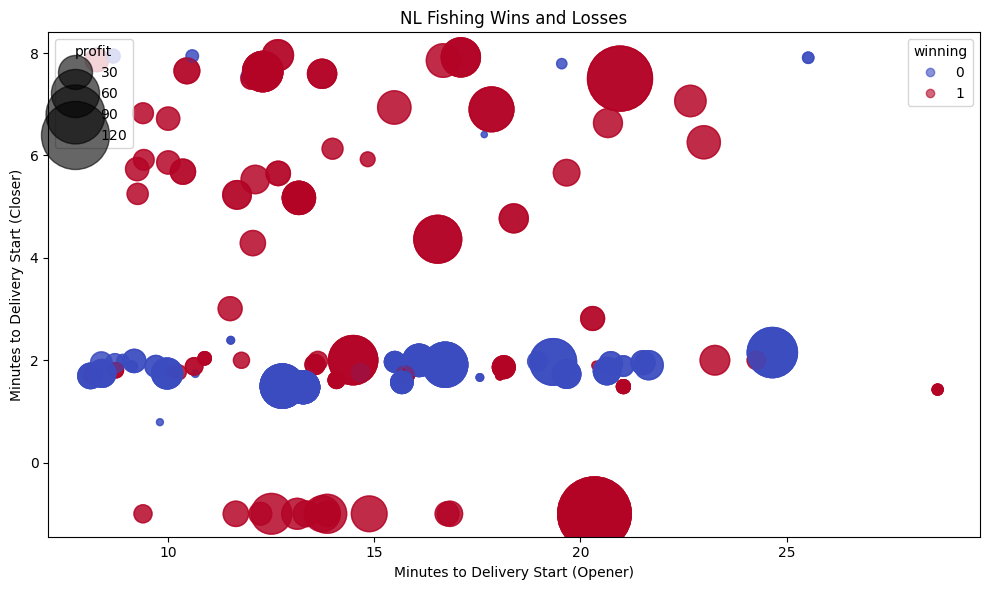

In [273]:
fig, ax = nlfisk.scatter_plot_for_hours(data_vis,
                             x_variable='weighted_minutes_to_delivery_start_opener',
                             y_variable='weighted_minutes_to_delivery_start_closer',
                             boolean_variable='winning',
                             size_variable='profit',
                             title='NL Fishing Wins and Losses',
                             x_label_str='Minutes to Delivery Start (Opener)',
                             y_label_str='Minutes to Delivery Start (Closer)',)
plt.show()
fig.savefig('../outputs/04_hours_to_hours.jpeg', dpi=300)

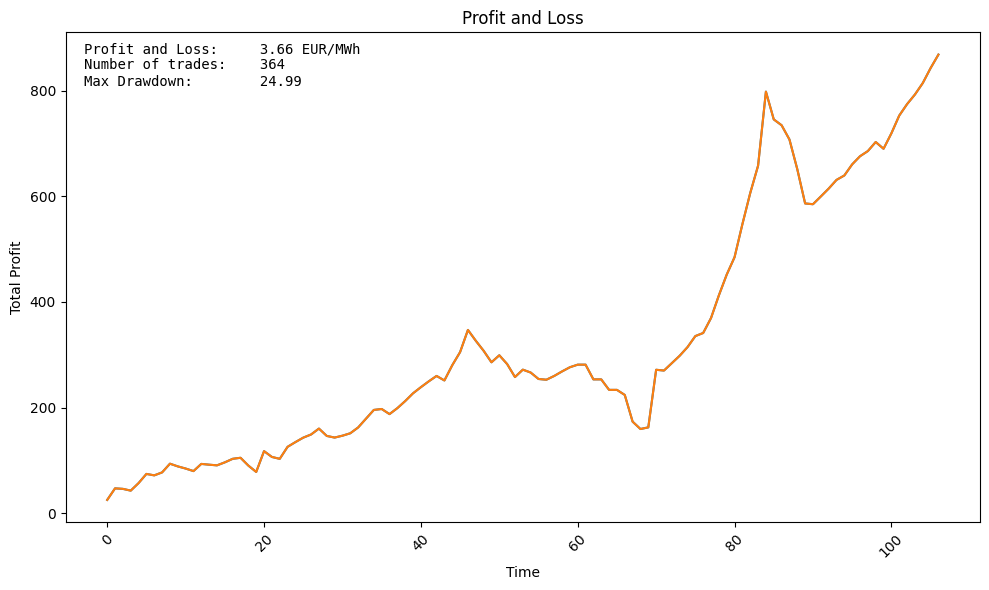

In [274]:
pnl_data = data_vis[['contract_id', 'pnl', 'delivery_start']].drop_duplicates().sort_values(by='delivery_start', ascending=True)
pnl_data.reset_index(drop=True, inplace=True)
pnl_data.pnl.plot()

plot = pnl_data.pnl.plot()

eur_mwh = round(pnl_data.pnl.iloc[-1] / nlfisk.trades.quantity.sum(),2)
number_of_trades = nlfisk.trades.trade_id.count()
max_drawdown = round(pnl_data.pnl.min(),2)


# Adjust the figure size if needed
plt.gcf().set_size_inches(10, 6)  # Makes the figure larger

# Add labels and title if desired
plt.xlabel('Time')
plt.ylabel('Total Profit')
plt.title(f"Profit and Loss") 

text_template = (
    "Profit and Loss:     %(profit).2f EUR/MWh\n"
    "Number of trades:    %(trades)d\n"
    "Max Drawdown:        %(drawdown).2f"
)
text_values = {
    'profit': eur_mwh,
    'trades': number_of_trades,
    'drawdown': max_drawdown
}
plt.text(0.02, 0.98,
         text_template % text_values,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='left',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=3),
         family='monospace')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Save the figure
plt.savefig('../outputs/04_hours_to_profit.jpeg',
            dpi=300,
            bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [191]:
dk1_high_low = pd.read_csv("/home/dana/development/intradays/Intraday/sources/dk1-dayahead-vwap-2025-01-16.csv")
dk2_high_low = pd.read_csv("/home/dana/development/intradays/Intraday/sources/dk2-dayahead-vwap-2025-01-16.csv")

<Axes: >

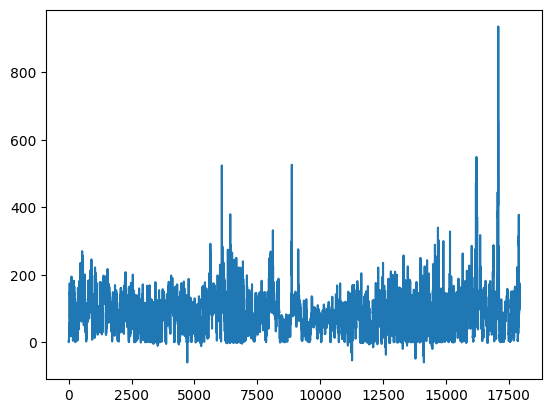

In [229]:
dk2_high_low.dayahead.plot()

(0.0, 1000.0)

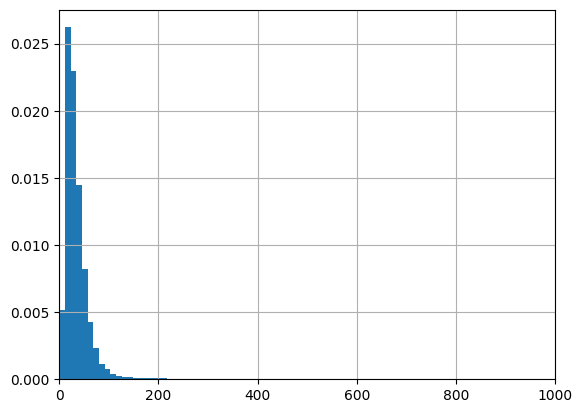

In [222]:
# Strength of the spot price for NL
dk1_high_low['spot_strength'] = dk1_high_low['high_price'] - dk1_high_low['low_price']
ax = plt.gca()
fig = dk1_high_low['spot_strength'].hist(bins=400, density=True)
ax.set_xlim([0, 1000])
# ax.set_xlim([-100, 100])
# ax.set_ylim([0, 0.06])

(0.0, 1000.0)

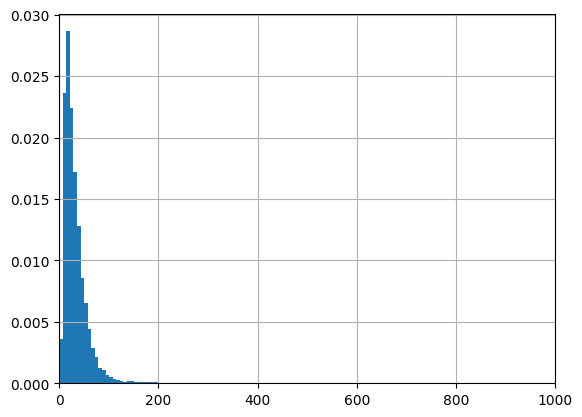

In [220]:
# Strength of the spot price for NL
dk2_high_low['spot_strength'] = dk2_high_low['high_price'] - dk2_high_low['low_price']
ax = plt.gca()
fig = dk2_high_low['spot_strength'].hist(bins=400, density=True)
ax.set_xlim([0, 1000])
# ax.set_xlim([-100, 100])
# ax.set_ylim([0, 0.06])

In [175]:
high_low = pd.read_csv("/tmp/2020_2025_EC_FORECASE_PLUS_PRICE_AND_SPREADS.csv")

In [223]:
high_low[high_low['high_price'] ==  high_low['low_price']]

,Unnamed: 0,de_consumption,de_wind,de_solar,nl_consumption,nl_wind,nl_solar,nl_forecast_price,high_price,low_price,...,close_price,average_price,volume,buy_volume,sell_volume,average_price_last_3h,average_price_last_1h,hour,dayahead,spot_strength
20826,2022-08-31 07:00:00+02:00,57597.0,6758.5196,2183.0,12171.0,3116.1760,252.0,541.92,430.92,430.92,...,430.92,430.92,0.175,0.175,0.175,430.92,NaN,7.0,492.31,0.0
21672,2022-07-27 01:00:00+02:00,47187.0,12264.6180,0.0,11516.0,1063.0926,0.0,331.32,275.00,275.00,...,275.00,275.00,1.300,1.300,1.300,NaN,NaN,1.0,317.99,0.0
22317,2022-06-30 04:00:00+02:00,47247.0,9121.3050,0.0,11320.0,941.9626,0.0,242.91,255.19,255.19,...,255.19,255.19,0.375,0.375,0.000,255.19,255.19,4.0,264.62,0.0
22667,2022-06-15 14:00:00+02:00,62857.0,864.1420,37138.0,7926.0,171.4356,6518.0,138.36,100.00,100.00,...,100.00,100.00,25.000,25.000,25.000,NaN,NaN,14.0,141.21,0.0
23113,2022-05-28 00:00:00+02:00,44987.0,28665.5270,0.0,11446.0,3440.9064,0.0,235.13,250.00,250.00,...,250.00,250.00,10.000,10.000,10.000,NaN,NaN,0.0,248.61,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43971,2020-01-09 21:00:00+01:00,62017.0,27059.2393,0.0,14849.0,1965.1920,0.0,42.62,32.02,32.02,...,32.02,32.02,5.000,0.000,5.000,NaN,NaN,21.0,30.90,0.0
43973,2020-01-09 19:00:00+01:00,69210.0,28798.6736,0.0,16563.0,2381.5816,0.0,55.35,44.00,44.00,...,44.00,44.00,15.000,0.000,15.000,NaN,NaN,19.0,41.03,0.0
43979,2020-01-09 13:00:00+01:00,70155.0,26074.9506,3445.0,16183.0,3577.3459,200.0,41.71,33.30,33.30,...,33.30,33.30,20.000,0.000,20.000,33.30,NaN,13.0,34.04,0.0
44118,2020-01-03 18:00:00+01:00,66075.0,31286.8111,0.0,16746.0,2589.4486,0.0,46.78,37.00,37.00,...,37.00,37.00,14.000,14.000,0.000,37.00,NaN,18.0,49.84,0.0


(0.0, 1000.0)

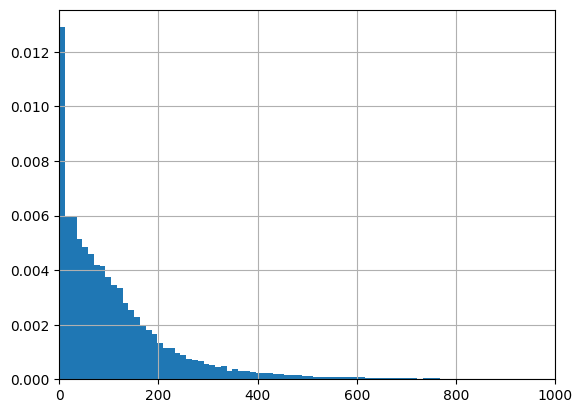

In [219]:
# Strength of the spot price for NL
high_low['spot_strength'] = high_low['high_price'] - high_low['low_price']
ax = plt.gca()
fig = high_low['spot_strength'].hist(bins=400, density=True)
ax.set_xlim([0, 1000])
# ax.set_ylim([0, 0.06])

In [105]:
high_low =high_low[high_low['Unnamed: 0'] <= '2025-01-14 16:00:00+01:00']

In [106]:
high_low.set_index('Unnamed: 0', inplace=True)
high_low.index = pd.to_datetime(high_low.index)
high_low.sort_index(inplace=True)

/tmp/ipykernel_13002/2664494329.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  high_low.index = pd.to_datetime(high_low.index)


In [142]:
high_low['vola'] = high_low['average_price_last_3h'] - high_low['dayahead']

In [143]:
high_low.dayahead.quantile(0.95)
high_low.dayahead.quantile(0.05)
high_low.dayahead.quantile(0.30)
high_low.vola.quantile(0.9)

np.float64(25.657000000000043)

In [173]:
high_low['hours_of_contract'] = high_low.index.astype(str).str[11:13].astype(int)

In [174]:
high_low

,de_consumption,de_wind,de_solar,nl_consumption,nl_wind,nl_solar,nl_forecast_price,high_price,low_price,open_price,...,average_price,volume,buy_volume,sell_volume,average_price_last_3h,average_price_last_1h,hour,dayahead,vola,hours_of_contract
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2020-01-02 01:00:00+01:00,41241.0,10365.6107,0.0,10673.0,734.6304,0.0,34.12,34.96,31.81,33.00,...,33.76,110.000,110.000,0.000,33.76,NaN,1.0,31.98,1.78,1
2020-01-02 02:00:00+01:00,40838.0,10837.6624,0.0,10478.0,850.6670,0.0,31.34,31.89,29.81,30.48,...,30.52,115.800,115.800,0.000,30.54,NaN,2.0,30.50,0.04,2
2020-01-02 03:00:00+01:00,40809.0,11588.1149,0.0,10443.0,970.1339,0.0,29.14,30.08,27.38,29.60,...,28.68,118.900,118.900,0.000,27.72,NaN,3.0,28.79,-1.07,3
2020-01-02 04:00:00+01:00,42102.0,12597.3393,0.0,10576.0,1095.5996,0.0,27.85,32.35,28.29,28.29,...,29.82,343.600,180.000,163.600,30.05,NaN,4.0,28.42,1.63,4
2020-01-02 05:00:00+01:00,44774.0,12121.8477,0.0,11126.0,1149.0395,0.0,29.35,33.49,27.50,27.50,...,29.78,271.600,142.700,128.900,32.25,NaN,5.0,28.75,3.50,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-14 12:00:00+01:00,72842.0,23924.7470,15488.0,12654.0,3837.0880,2168.0,94.25,179.93,12.10,102.65,...,84.72,1044.525,1043.075,1030.000,86.20,88.66,12.0,93.72,-7.52,12
2025-01-14 13:00:00+01:00,71403.0,23290.8830,14048.0,12176.0,3631.9380,2278.0,91.35,115.93,11.33,77.76,...,86.93,1206.525,1100.075,1171.475,83.15,50.49,13.0,105.00,-21.85,13
2025-01-14 14:00:00+01:00,69750.0,23942.1780,10528.0,12573.0,3647.2660,2041.0,94.39,143.85,-1000.00,132.82,...,77.86,1657.825,1346.725,1359.575,41.91,26.79,14.0,115.56,-73.65,14


In [ ]:
high_low['vola'].describe()

count    41984.000000
mean         0.485111
std         35.306972
min       -439.040000
25%         -9.310000
50%         -0.270000
75%          8.720000
max       1421.360000
Name: vola, dtype: float64

In [35]:
pnl_data.pnl.iloc[-1] / nlfisk.trades.quantity.sum()


np.float64(1.2331922398589075)

In [579]:
nlfisk.trades[nlfisk.trades['delivery_start'] == '2025-01-12 08:00:00+00:00'][['delivery_start', 'exec_time', 'price', 'quantity', 'buy']]

,delivery_start,exec_time,price,quantity,buy
27,2025-01-12 08:00:00+00:00,2025-01-11 14:56:55.703000+00:00,134.64,1.0,None
35,2025-01-12 08:00:00+00:00,2025-01-11 21:20:13.230000+00:00,118.07,1.0,True


In [562]:
data_vis[data_vis['delivery_start'] == '2025-01-12 08:00:00+00:00'][['delivery_start', 'exec_time', 'price', 'quantity', 'buy', 'profit','weighted_minutes_to_delivery_start_closer']]

,delivery_start,exec_time,price,quantity,buy,profit,weighted_minutes_to_delivery_start_closer
20,2025-01-12 08:00:00+00:00,2025-01-11 21:20:13.230000+00:00,118.07,1.0,True,16.57,NaN
55,2025-01-12 08:00:00+00:00,2025-01-11 14:56:55.703000+00:00,134.64,1.0,None,16.57,NaN


In [553]:
data_vis[data_vis['weighted_minutes_to_delivery_start_closer'].isna()]
#data_vis.describe()

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,weighted_minutes_to_delivery_start,quantity_bought,price_bought,quantity_sold,price_sold,profit,pnl,winning,weighted_minutes_to_delivery_start_opener,weighted_minutes_to_delivery_start_closer
20,X589061080,ACTI,nordpool,10YNL----------L,2025-01-11 21:20:22.522000+00:00,2025-01-11 21:20:13.230000+00:00,NX_498929,PH-20250112-10,2025-01-12 08:00:00+00:00,2025-01-12 09:00:00+00:00,...,13.857093,1.0,118.07,1.0,134.64,16.57,101.831,True,13.857093,NaN
21,X589068390,ACTI,nordpool,10YNL----------L,2025-01-11 21:27:28.633000+00:00,2025-01-11 21:27:28.534000+00:00,NX_498975,PH-20250112-16,2025-01-12 14:00:00+00:00,2025-01-12 15:00:00+00:00,...,16.762281,1.0,114.32,1.0,129.07,14.75,133.391,True,16.762281,NaN
22,X589071276,ACTI,nordpool,10YNL----------L,2025-01-11 21:30:15.715000+00:00,2025-01-11 21:30:14.612000+00:00,NX_498922,PH-20250112-09,2025-01-12 07:00:00+00:00,2025-01-12 08:00:00+00:00,...,11.637634,1.0,112.76,1.0,129.36,16.60,85.261,True,11.637634,NaN
23,X589257016,ACTI,nordpool,10YNL----------L,2025-01-12 04:44:29.041000+00:00,2025-01-12 04:44:28.980000+00:00,NX_498967,PH-20250112-15,2025-01-12 13:00:00+00:00,2025-01-12 14:00:00+00:00,...,12.232646,1.0,101.23,1.0,114.62,13.39,118.641,True,12.232646,NaN
30,X589613493,ACTI,nordpool,10YNL----------L,2025-01-12 14:28:39.245000+00:00,2025-01-12 14:28:39.192000+00:00,NX_499109,PH-20250113-09,2025-01-13 07:00:00+00:00,2025-01-13 08:00:00+00:00,...,13.127061,1.0,195.92,1.0,220.80,24.88,211.405,True,13.127061,NaN
55,X588862915,ACTI,nordpool,10YNL----------L,2025-01-11 14:56:55.737000+00:00,2025-01-11 14:56:55.703000+00:00,NX_498929,PH-20250112-10,2025-01-12 08:00:00+00:00,2025-01-12 09:00:00+00:00,...,13.857093,1.0,118.07,1.0,134.64,16.57,101.831,True,13.857093,NaN
59,X588945791,ACTI,nordpool,10YNL----------L,2025-01-11 17:13:14.464000+00:00,2025-01-11 17:13:14.421000+00:00,NX_498922,PH-20250112-09,2025-01-12 07:00:00+00:00,2025-01-12 08:00:00+00:00,...,11.637634,1.0,112.76,1.0,129.36,16.60,85.261,True,11.637634,NaN
60,X589046208,ACTI,nordpool,10YNL----------L,2025-01-11 20:47:36.037000+00:00,2025-01-11 20:47:35.971000+00:00,NX_498967,PH-20250112-15,2025-01-12 13:00:00+00:00,2025-01-12 14:00:00+00:00,...,12.232646,1.0,101.23,1.0,114.62,13.39,118.641,True,12.232646,NaN
62,X589051631,ACTI,nordpool,10YNL----------L,2025-01-11 21:01:03.186000+00:00,2025-01-11 21:01:03.043000+00:00,NX_498975,PH-20250112-16,2025-01-12 14:00:00+00:00,2025-01-12 15:00:00+00:00,...,16.762281,1.0,114.32,1.0,129.07,14.75,133.391,True,16.762281,NaN
66,X589821950,ACTI,nordpool,10YNL----------L,2025-01-12 21:16:06.009000+00:00,2025-01-12 21:16:05.970000+00:00,NX_499109,PH-20250113-09,2025-01-13 07:00:00+00:00,2025-01-13 08:00:00+00:00,...,13.127061,1.0,195.92,1.0,220.80,24.88,211.405,True,13.127061,NaN


In [197]:
data_closer = nlfisk.trades_from_closer
data_closer.shape

(95, 19)

In [ ]:
target_date = pd.Timestamp('2025-01-14T00:00:00Z', tz='UTC')
filtered_df2 = data_closer.loc[data_closer['delivery_start'] > target_date]
filtered_df2.shape

In [207]:
data_opener = nlfisk.trades_from_opener
from_hour_date = pd.Timestamp('2025-01-13T8:00:00Z', tz='UTC')
to_hour_date = pd.Timestamp('2025-01-13T9:00:00Z', tz='UTC')
opener_for_the_hour = data_opener.loc[(data_opener['delivery_start'] >= from_hour_date) & (data_opener['delivery_start'] < to_hour_date)]
opener_for_the_hour.head()

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,quantity,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor
49,X589622248,ACTI,nordpool,10YNL----------L,2025-01-12 14:43:16.563000+00:00,2025-01-12 14:43:16.504000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,True,None,P_NL5,None,Regular BUY --BUY--Hour:10--Ref:153.9--Opp:171.0,None,False,17.278749,17
44,X589821976,ACTI,nordpool,10YNL----------L,2025-01-12 21:16:15.898000+00:00,2025-01-12 21:16:15.854000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Opportunity BUY --BUY--Hour:10--Ref:153.9--Opp...,False,10.728929,10
42,X589888114,ACTI,nordpool,10YNL----------L,2025-01-12 23:08:12.787000+00:00,2025-01-12 23:08:12.733000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:10--Ref:188.1--Opp:1...,False,8.863130,8


In [204]:
data_opener.loc[:,'diff_hour'] = (data_opener.loc[:,'delivery_start'] - data_opener.loc[:,'exec_time']).dt.total_seconds() / 60  / 60
data_opener.loc[:, 'diff_hour_floor'] = data_opener['diff_hour'].apply(np.floor).apply(int)

In [200]:
# time before
# compute the minutes between delivery_start - exec_time
data_closer.loc[:,'diff_hour'] = (data_closer.loc[:,'delivery_start'] - data_closer.loc[:,'exec_time']).dt.total_seconds() / 60  / 60
data_closer.loc[:, 'diff_hour_floor'] = data_closer['diff_hour'].apply(np.floor).apply(int)

<Axes: >

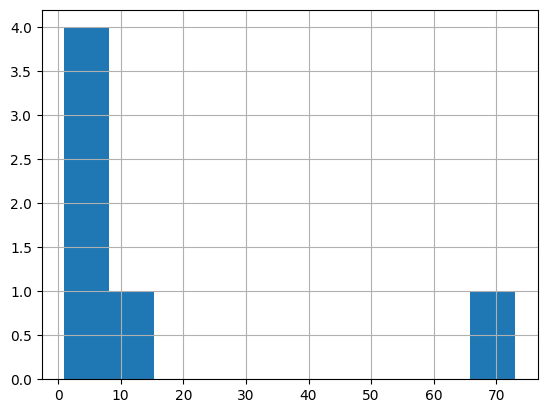

In [372]:
data_closer['diff_hour_floor'].value_counts().hist()

<Axes: >

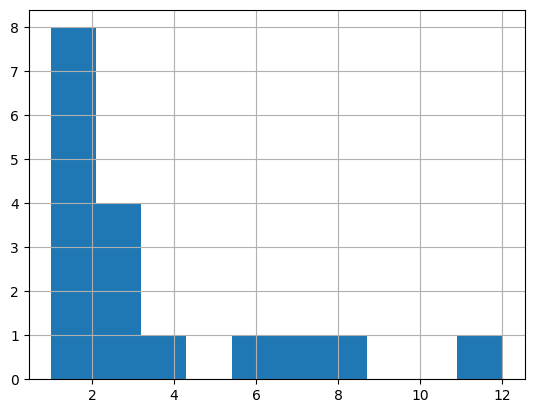

In [370]:
data_opener['diff_hour_floor'].value_counts().hist()

In [210]:
data_opener[data_opener['contract_id'] == 'NX_499119']

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,quantity,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor
49,X589622248,ACTI,nordpool,10YNL----------L,2025-01-12 14:43:16.563000+00:00,2025-01-12 14:43:16.504000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,True,None,P_NL5,None,Regular BUY --BUY--Hour:10--Ref:153.9--Opp:171.0,None,False,17.278749,17
44,X589821976,ACTI,nordpool,10YNL----------L,2025-01-12 21:16:15.898000+00:00,2025-01-12 21:16:15.854000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Opportunity BUY --BUY--Hour:10--Ref:153.9--Opp...,False,10.728929,10
42,X589888114,ACTI,nordpool,10YNL----------L,2025-01-12 23:08:12.787000+00:00,2025-01-12 23:08:12.733000+00:00,NX_499119,PH-20250113-10,2025-01-13 08:00:00+00:00,2025-01-13 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:10--Ref:188.1--Opp:1...,False,8.863130,8


In [538]:
data_opener[data_opener['contract_id'] == 'NX_499119']
data_closer[data_closer['contract_id'] == 'NI_606275']

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor,diff_minutes


* 2 MW sold, 1 MW bought - this was profitable? -> check performance of position opener against our own trades
    * selling prices buying prices how to match them meaningfully?

* average hour weighted by volume for position opener and closer and then see where the profit comes

In [ ]:
# Average sell and buy prices per contract_id

In [220]:
data_closer.columns

Index(['trade_id', 'state', 'exchange', 'delivery_area', 'api_timestamp',
       'exec_time', 'contract_id', 'contract_name', 'delivery_start',
       'delivery_end', 'price', 'quantity', 'buy', 'sell', 'buy_portfolio_id',
       'sell_portfolio_id', 'buy_txt', 'sell_txt', 'self_trade', 'diff_hour',
       'diff_hour_floor'],
      dtype='object')

In [287]:
data_opener.groupby(['contract_id', 'buy'])['price'].mean()
tablebuy = data_opener.groupby(['contract_id', 'buy'])['quantity'].sum()

# data_closer[(data_closer['contract_id'] == 'NX_499119') & (data_closer['buy'] == True)]

In [244]:
tablebuy = pd.DataFrame(tablebuy)
tablebuy

,,quantity
contract_id,buy,
NX_498570,True,1.0
NX_498578,True,1.0
NX_498586,True,1.0
NX_498596,True,1.0
NX_498604,True,1.0
NX_498612,True,1.0
NX_498623,True,1.0
NX_498630,True,1.0
NX_498653,True,1.0


In [286]:
data_opener.groupby(['contract_id', 'sell'])['price'].mean()
tablesell = data_opener.groupby(['contract_id', 'sell'])['quantity'].sum()
tablesell = pd.DataFrame(tablesell)
tablesell

,,quantity
contract_id,sell,
NX_498517,True,1.0
NX_498524,True,1.0
NX_498531,True,1.0
NX_498538,True,1.0
NX_498630,True,2.0
NX_498763,True,1.0
NX_498905,True,1.0
NX_498922,True,1.0
NX_498929,True,1.0


In [292]:
opener_performance = pd.merge(tablesell, tablebuy, on='contract_id', how='outer')
equal_openers = opener_performance[opener_performance['quantity_x'] == opener_performance['quantity_y']]
equal_openers = equal_openers.reset_index().rename(columns={'index': 'contract_id'})
opener_only = data_opener[data_opener['contract_id'].isin(equal_openers['contract_id'])]
opener_only.shape


(10, 21)

In [289]:
data_opener[data_opener['contract_id'] == 'NX_498929']

,trade_id,state,exchange,delivery_area,api_timestamp,exec_time,contract_id,contract_name,delivery_start,delivery_end,...,quantity,buy,sell,buy_portfolio_id,sell_portfolio_id,buy_txt,sell_txt,self_trade,diff_hour,diff_hour_floor
38,X588862915,ACTI,nordpool,10YNL----------L,2025-01-11 14:56:55.737000+00:00,2025-01-11 14:56:55.703000+00:00,NX_498929,PH-20250112-10,2025-01-12 08:00:00+00:00,2025-01-12 09:00:00+00:00,...,1.0,None,True,None,P_NL5,None,Regular SELL --SELL--Hour:10--Ref:132.08--Opp:...,False,17.051194,17
30,X589061080,ACTI,nordpool,10YNL----------L,2025-01-11 21:20:22.522000+00:00,2025-01-11 21:20:13.230000+00:00,NX_498929,PH-20250112-10,2025-01-12 08:00:00+00:00,2025-01-12 09:00:00+00:00,...,1.0,True,None,P_NL5,None,Opportunity SELL --SELL--Hour:10--Ref:132.08--...,None,False,10.662992,10


<Axes: xlabel='diff_hour_floor', ylabel='price_diff'>

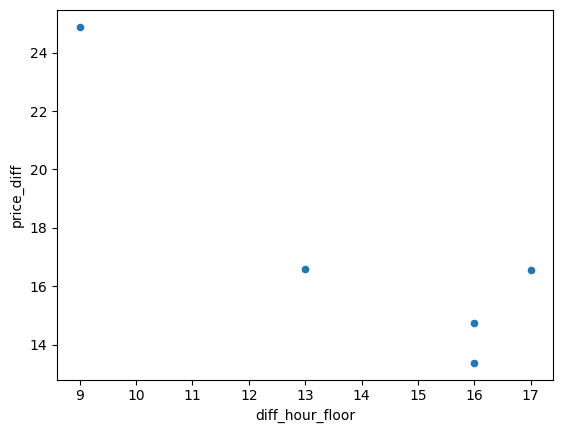

In [303]:
small_opener = opener_only.sort_values(by=['contract_id','buy', 'delivery_start'])[['contract_id','buy','delivery_start', 'price', 'diff_hour_floor']]
small_opener['price_diff'] = small_opener.groupby('contract_id')['price'].diff()
small_opener.plot(x='diff_hour_floor', y='price_diff', kind='scatter')

In [365]:
data_opener.loc[:,'diff_minutes'] = (data_opener.loc[:,'delivery_start'] - data_opener.loc[:,'exec_time']).dt.total_seconds() / 60

data_closer.loc[:,'diff_minutes'] = (data_closer.loc[:,'delivery_start'] - data_closer.loc[:,'exec_time']).dt.total_seconds() / 60

opener_grouped_weighted_mean = (
    data_opener.groupby('contract_id')
    .apply(lambda x: np.average(x['diff_minutes'], weights=x['quantity']), include_groups=False)
)
closer_grouped_weighted_mean = (
    data_closer.groupby('contract_id')
    .apply(lambda x: np.average(x['diff_minutes'], weights=x['quantity']), include_groups=False)
)
avg_hours_opener = opener_grouped_weighted_mean.reset_index().rename(columns={0: 'avg_hours_opener'})
avg_hours_closer = closer_grouped_weighted_mean.reset_index().rename(columns={0: 'avg_hours_closer'})
avg_hours = pd.merge(avg_hours_opener, avg_hours_closer, on='contract_id', how='outer')
dates_of_trades = nlfisk.trades[nlfisk.trades['contract_id'].isin(avg_hours['contract_id'])][['contract_id', 'delivery_start']]
contracts_to_analyze = nlfisk.trades[nlfisk.trades['contract_id'].isin(avg_hours['contract_id'])]

# get dates of trades
dates_of_trades = nlfisk.trades[nlfisk.trades['contract_id'].isin(avg_hours['contract_id'])][['contract_id', 'delivery_start']]
dates_of_trades['delivery_start_date'] = dates_of_trades['delivery_start'].dt.day
dates_of_trades = dates_of_trades[['contract_id', 'delivery_start_date']]

# get sum of trades
bought_amount = contracts_to_analyze.groupby(['contract_id', 'buy'])['quantity'].sum()
sold_amount = contracts_to_analyze.groupby(['contract_id', 'sell'])['quantity'].sum()
buy_price_avg = contracts_to_analyze.groupby(['contract_id', 'buy'])['price'].mean()
sell_price_avg = contracts_to_analyze.groupby(['contract_id', 'sell'])['price'].mean()

# compute profit and loss bought amount times buy price - sold amount times sell price
bought_amount = pd.DataFrame(bought_amount)
sold_amount = pd.DataFrame(sold_amount)
buy_price_avg = pd.DataFrame(buy_price_avg)
sell_price_avg = pd.DataFrame(sell_price_avg)
buy_sell = pd.merge(bought_amount, sold_amount, on='contract_id', how='outer')
buy_sell.rename(columns={'quantity_x': 'quantity_bought', 'quantity_y': 'quantity_sold'}, inplace=True)
buy_sell = pd.merge(buy_sell, buy_price_avg, on='contract_id', how='outer')
buy_sell.rename(columns={'price': 'price_bought'}, inplace=True)
buy_sell = pd.merge(buy_sell, sell_price_avg, on='contract_id', how='outer')
buy_sell.rename(columns={'price': 'price_sold'}, inplace=True)
buy_sell = buy_sell.fillna(0)
buy_sell['profit'] = buy_sell['quantity_sold'] * buy_sell['price_sold'] - buy_sell['quantity_bought'] * buy_sell['price_bought']
buy_sell['pnl'] = buy_sell['profit'].cumsum()

with_hours = pd.merge(buy_sell, avg_hours, on='contract_id', how='left')
with_hours = pd.merge(with_hours, dates_of_trades, on='contract_id', how='left')



<Axes: xlabel='delivery_start_date', ylabel='profit'>

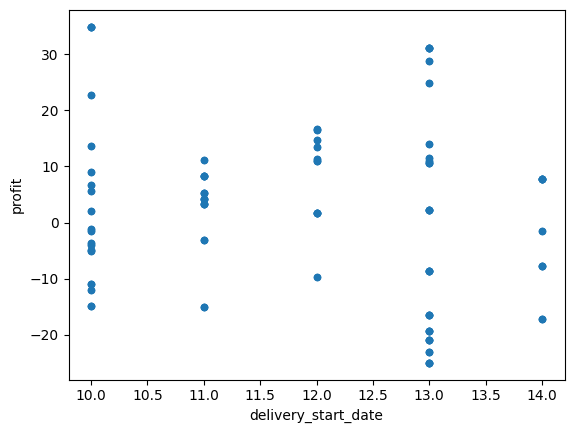

In [356]:
with_hours.plot(x='delivery_start_date', y='profit', kind='scatter')

 # with_hours

<Axes: xlabel='avg_hours_opener', ylabel='profit'>

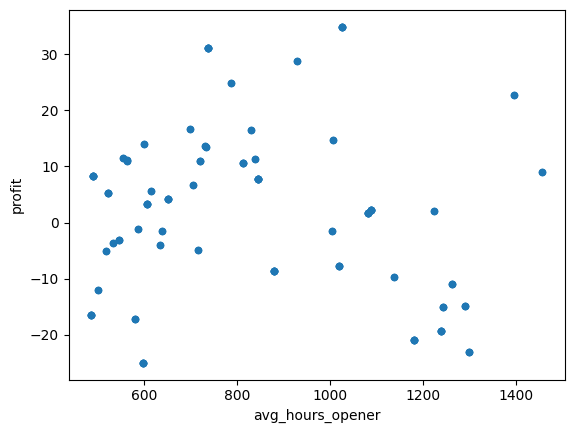

In [361]:
with_hours.plot(x='avg_hours_opener', y='profit', kind='scatter')

<Axes: >

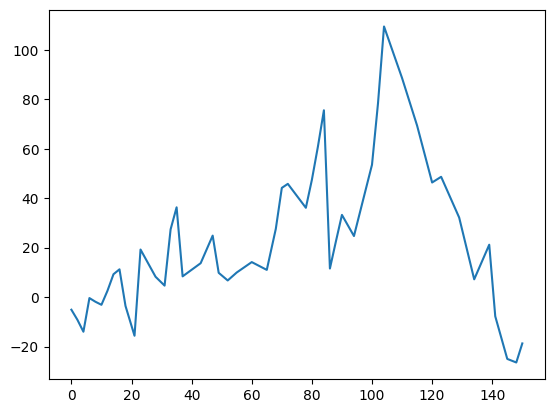

In [369]:
#with_hours.groupby('delivery_start_date')['profit'].cumsum().plot()
with_hours.drop_duplicates().groupby('delivery_start_date')['profit'].cumsum().plot()

In [275]:
from datetime import datetime, timedelta, date
from src.Elexon import ELEXONDownloaderManager

# Initialize the downloader manager
manager = ELEXONDownloaderManager()

# Set up various time ranges
current_time = datetime.now()
start_date = current_time - timedelta(days=2)  # Using 2 days to stay within limits
end_date = current_time

publish_from = current_time - timedelta(hours=24)  # Last 24 hours for publish time datasets
publish_to = current_time

# 1. ATL (Actual Total Load)
print("\n1. Downloading ATL data...")
atl_data = manager.download('ATL', start_date, end_date)
print("ATL data shape:", atl_data.shape if not atl_data.empty else "No data")

# 2. DATL (Day-Ahead Total Load Forecast)
print("\n2. Downloading DATL data...")
datl_data = manager.download('DATL', publish_from, publish_to)
print("DATL data shape:", datl_data.shape if not datl_data.empty else "No data")

# 3. WINDFOR_Latest (Latest Wind Generation Forecast)
print("\n3. Downloading WINDFOR_Latest data...")
windfor_latest_data = manager.download('WINDFOR_Latest', start_date, end_date)
print("WINDFOR_Latest data shape:", windfor_latest_data.shape if not windfor_latest_data.empty else "No data")

# 4. WINDFOR (Wind Generation Forecast)
print("\n4. Downloading WINDFOR data...")
windfor_data = manager.download('WINDFOR', publish_from, publish_to)
print("WINDFOR data shape:", windfor_data.shape if not windfor_data.empty else "No data")

# 5. NDF_Latest (Latest National Demand Forecast)
print("\n5. Downloading NDF_Latest data...")
ndf_latest_data = manager.download('NDF_Latest', start_date, end_date)
print("NDF_Latest data shape:", ndf_latest_data.shape if not ndf_latest_data.empty else "No data")

# 6. NDF (National Demand Forecast)
# Note: Using shorter time range as NDF has 1-day limit
ndf_publish_from = current_time - timedelta(hours=12)  # Last 12 hours to stay within limits
print("\n6. Downloading NDF data...")
ndf_data = manager.download('NDF', ndf_publish_from, publish_to)
print("NDF data shape:", ndf_data.shape if not ndf_data.empty else "No data")

# 7. TEMP (Temperature Data)
print("\n7. Downloading TEMP data...")
temp_data = manager.download('TEMP', start_date.date(), end_date.date())
print("TEMP data shape:", temp_data.shape if not temp_data.empty else "No data")

# 8. DISEBSP (Settlement System Prices)
print("\n8. Downloading DISEBSP data...")
disebsp_data = manager.download('DISEBSP', start_date, end_date)
print("DISEBSP data shape:", disebsp_data.shape if not disebsp_data.empty else "No data")

# 9. FUELHH (Generation By Fuel Type)
print("\n9. Downloading FUELHH data...")
fuelhh_data = manager.download('FUELHH', start_date, end_date)
print("FUELHH data shape:", fuelhh_data.shape if not fuelhh_data.empty else "No data")

# Print summary of downloaded files
print("\nDownloaded files can be found in the /tmp directory:")
print("--------------------------------------------------------")
for dataset in ['ATL', 'DATL', 'WINDFOR_Latest', 'WINDFOR', 'NDF_Latest',
                'NDF', 'TEMP', 'DISEBSP', 'FUELHH']:
    print(f"{dataset}: /home/dana/development/intradays/Intraday/sources/{dataset}_*.csv")


1. Downloading ATL data...
Data for Actual Total Load (ATL) downloaded successfully.
ATL data shape: (97, 5)

2. Downloading DATL data...
Data for Day-Ahead Total Load Forecast (DATL) downloaded successfully.
DATL data shape: (48, 8)

3. Downloading WINDFOR_Latest data...
Data for WINDFOR_Latest downloaded successfully.
WINDFOR_Latest data shape: (49, 5)

4. Downloading WINDFOR data...
Data for WINDFOR downloaded successfully.
WINDFOR data shape: (511, 4)

5. Downloading NDF_Latest data...
Data for NDF_Latest downloaded successfully.
NDF_Latest data shape: (97, 7)

6. Downloading NDF data...
Data for NDF downloaded successfully.
NDF data shape: (1217, 7)

7. Downloading TEMP data...
Data for TEMP downloaded successfully.
TEMP data shape: (2, 6)

8. Downloading DISEBSP data...
Data for DISEBSP downloaded successfully.
DISEBSP data shape: (126, 22)

9. Downloading FUELHH data...
Data for FUELHH downloaded successfully.
FUELHH data shape: (2520, 7)

Downloaded files can be found in the /